In [ ]:
%pip install flake8 pycodestyle_magic
%load_ext pycodestyle_magic
%pycodestyle_on

In [ ]:
from select import select
import random
import matplotlib.pyplot as plt

In [ ]:
class Point():
    'Точка'
    def __init__(self, x, y, number_class, color):
        self.x = x
        self.y = y
        self.number_class = number_class
        if number_class == 0:
            self.color = 'blue'
        elif number_class == 1:
            self.color = 'green'
        else:
            self.color = 'red'

    def get_colors(self):
        return self.color

    def get_info_class(self):
        return self.number_class

    def set_class(self, number_class):
        self.number_class = number_class
        if number_class == 0:
            self.color = 'blue'
        elif number_class == 1:
            self.color = 'green'
        else:
            self.color = 'red'


class KNN():
    'Алгоритм'

    def distance(points, classless):
        module_list = []

        for point in points:
            dist = ((point.x - classless.x)**2 +
                    (point.y - classless.y)**2)**0.5
            module_list.append(dist)

        return module_list

    def search_k_nearest(points, module_list, k):
        class_lenth_dict = {}
        for point in points:
            class_lenth_dict[module_list
                             [points.index(point)]] = point.number_class
        module_list = sorted(module_list)
        k_nearest = module_list[:k]
        print('nearest', k_nearest)
        return k_nearest, class_lenth_dict

    def voting(k_nearest, class_lenth_dict):
        c = []
        answers = []
        for neighbor in k_nearest:
            answers.append(class_lenth_dict[neighbor])
        for x in [0, 1]:
            c.append(answers.count(x))
            print('sum classes', c)
        return c

    def classificator(c, k_nearest, class_lenth_dict, point):
        if c[0] != c[1]:
            print('Point`s class is:', c.index(max(c)))
            return point.set_class(c.index(max(c)))
        else:
            return KNN.classificator(
                KNN.voting(k_nearest[:-1], class_lenth_dict),
                k_nearest, class_lenth_dict, point)

    def draw(X, point):
        class1 = [[], []]
        class2 = [[], []]
        for point in X:
            if point.number_class == 0:
                class1[0].append(point.x)
                class1[1].append(point.y)
            else:
                class2[0].append(point.x)
                class2[1].append(point.y)
        plt.scatter(class1[0], class1[1],
                    color='blue', marker='x', label='0')
        plt.scatter(class2[0], class2[1],
                    color='green', marker='*', label='1')
        plt.scatter(point.x, point.y, color='red')
        plt.xlim(0, 22)
        plt.ylim(0, 22)
        plt.legend(loc='upper right')
        plt.grid()

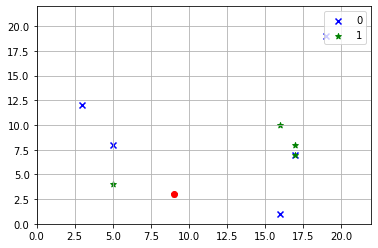

In [ ]:
Points = []
lenght = 10
while not (lenght <= 0):
    lenght -= 1
    x = random.randint(1, 20)
    y = random.randint(1, 20)
    Points.append(Point(x, y, random.randint(0, 1), 'white'))

for p in Points:
    print(p.x, p.y, p.get_info_class(), p.color)
classless = Point(10, 10, -1, 'red')
KNN.draw(Points, classless)

In [ ]:
k = 6
dist = KNN.distance(Points, classless)
nearest, class_dict = KNN.search_k_nearest(Points, dist, k)
vote = KNN.voting(nearest, class_dict)
KNN.classificator(vote, nearest, class_dict, classless)
print(classless.number_class)